In [1]:
import tensorflow as tf 
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("Dataset", shuffle = "True", image_size = (IMAGE_SIZE, IMAGE_SIZE), batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names 
class_names 

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[149. 134. 141.]
  [158. 143. 150.]
  [165. 150. 157.]
  ...
  [146. 130. 140.]
  [142. 126. 136.]
  [139. 123. 133.]]

 [[164. 149. 156.]
  [160. 145. 152.]
  [159. 144. 151.]
  ...
  [148. 132. 142.]
  [144. 128. 138.]
  [141. 125. 135.]]

 [[170. 155. 162.]
  [162. 147. 154.]
  [159. 144. 151.]
  ...
  [150. 134. 144.]
  [147. 131. 141.]
  [144. 128. 138.]]

 ...

 [[153. 140. 149.]
  [167. 154. 163.]
  [182. 169. 178.]
  ...
  [169. 156. 166.]
  [170. 157. 167.]
  [171. 158. 168.]]

 [[162. 149. 158.]
  [181. 168. 177.]
  [190. 177. 186.]
  ...
  [170. 157. 167.]
  [171. 158. 168.]
  [171. 158. 168.]]

 [[211. 198. 207.]
  [198. 185. 194.]
  [165. 152. 161.]
  ...
  [169. 156. 166.]
  [169. 156. 166.]
  [170. 157. 167.]]], shape=(256, 256, 3), dtype=float32)


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


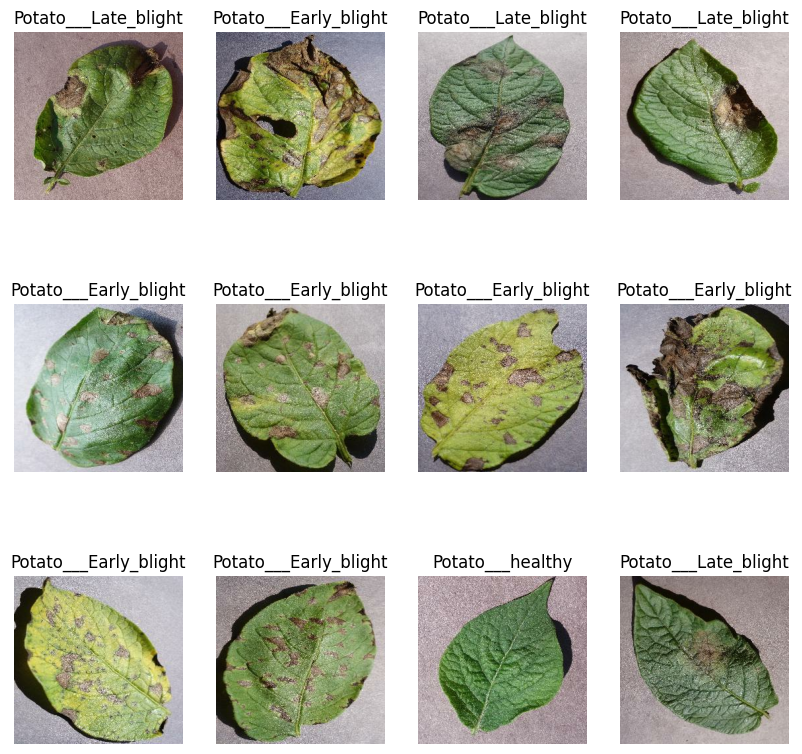

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12) :
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [9]:
len(dataset)

68

In [10]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [13]:
val_size =  0.1
len(dataset) * val_size

6.800000000000001

In [14]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [15]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000) :
    assert(train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle :
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

8